In [1]:
import numpy as np
import qutip as qt
import scipy as sc
import matplotlib as mpl
import matplotlib.colors as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys
import pycqed.physical_constants as pc
import ising_models
import ising_schedules
import save_data as sd

In [2]:
mpl.rcParams.update({'font.size':20}) # This sometimes needs to be run twice to make it work

In [3]:
mpl.rcParams.update({'font.size':20}) # This sometimes needs to be run twice to make it work

## Tameem Loop Gadget

First we will look at the 4 qubit loop gadget, with an initial 2.5 GHz transverse field on each qubit, and a problem strength $R$ of 2.5 GHz.

/home/dustyd/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


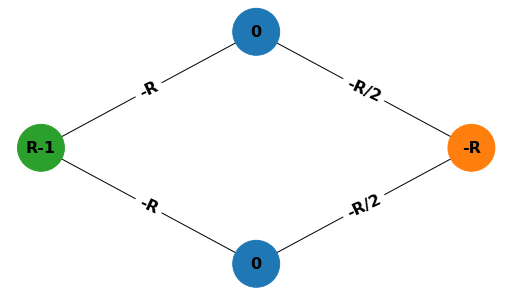

In [4]:
Nqb = 4
Rl = 2.5
hxl = Rl
loop1 = ising_models.LoopGadget(Nqb,R=Rl,hx_init=hxl)
loop1.drawHpGraph()

### Instantaneous gaps during an anneal:

In [5]:
tan = 30.0 # ns
schedule_params = {"tan":tan,"stype":"linear"}
anneal_times = np.linspace(0,tan,101)
Eloop = loop1.annealInstantaneousGap(schedule_params, anneal_times)

Get the minima for each gap

In [6]:
Eloop_min = loop1.annealMinimumGaps(anneal_times, Eloop)

Text(0.5, 1.0, 'Instantaneous Gaps')

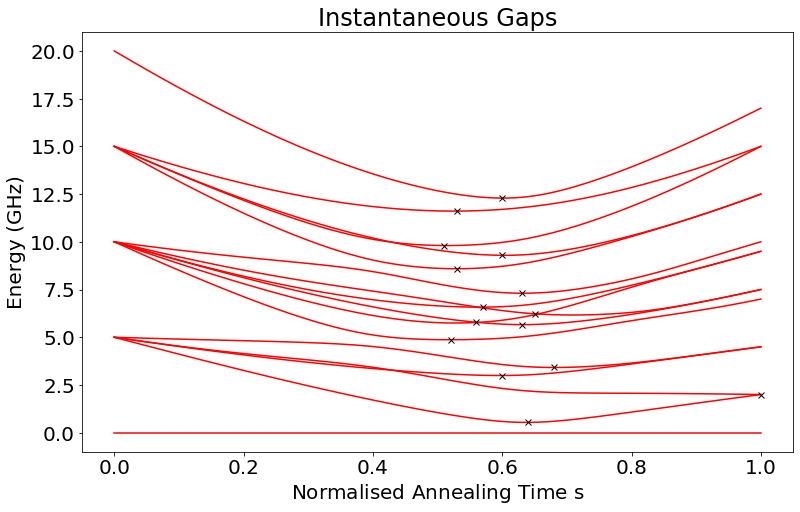

In [7]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(len(Eloop)):
    ax.plot(anneal_times/tan, Eloop[i]/(2*np.pi), "r-")
for i in range(len(Eloop_min)):
    ax.plot(Eloop_min[i][0]/tan, Eloop_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('Instantaneous Gaps')

In [8]:
print ("First gap:")
print (Eloop_min[0][1]/(2*np.pi))

First gap:
0.5398425821211714


Text(0.5, 1.0, 'First Instantaneous Gap')

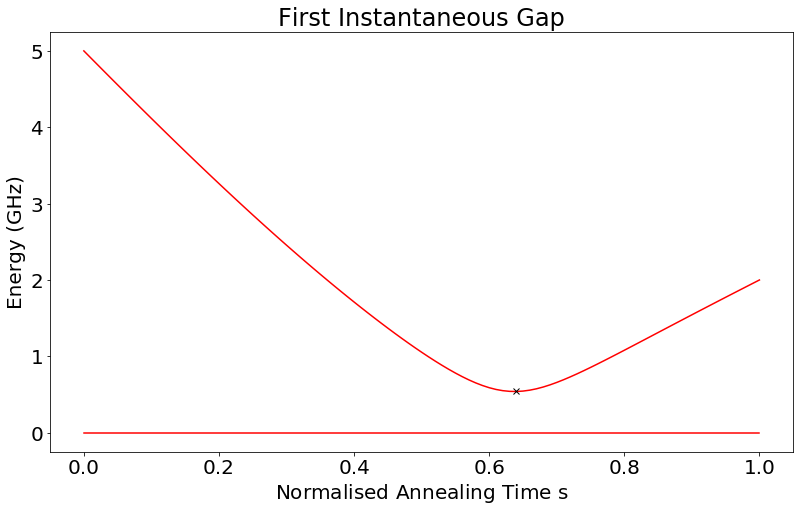

In [9]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(2):
    ax.plot(anneal_times/tan, Eloop[i]/(2*np.pi), "r-")
for i in range(1):
    ax.plot(Eloop_min[i][0]/tan, Eloop_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('First Instantaneous Gap')

## Tameem Chain Gadget

Now we look at the chain gadget, which features an asymmetric tunnel barrier.

/home/dustyd/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


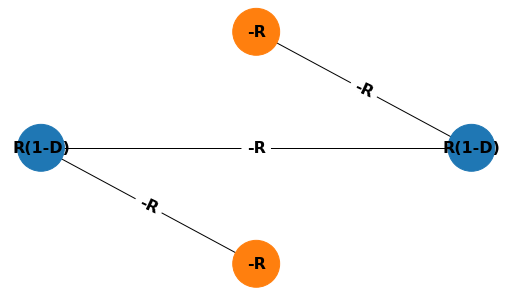

In [10]:
Rc = 14
D = 0.05
hxc = 2.5
chain1 = ising_models.ChainGadget(Nqb,R=Rc,D=D,hx_init=hxc)
chain1.drawHpGraph()

### Instantaneous gaps during an anneal:

In [11]:
tan = 30.0 # ns
schedule_params = {"tan":tan,"stype":"linear"}
anneal_times = np.linspace(0,tan,101)
Echain = chain1.annealInstantaneousGap(schedule_params, anneal_times)

Get the minima for each gap

In [12]:
Echain_min = chain1.annealMinimumGaps(anneal_times, Echain)

Text(0.5, 1.0, 'Instantaneous Gaps')

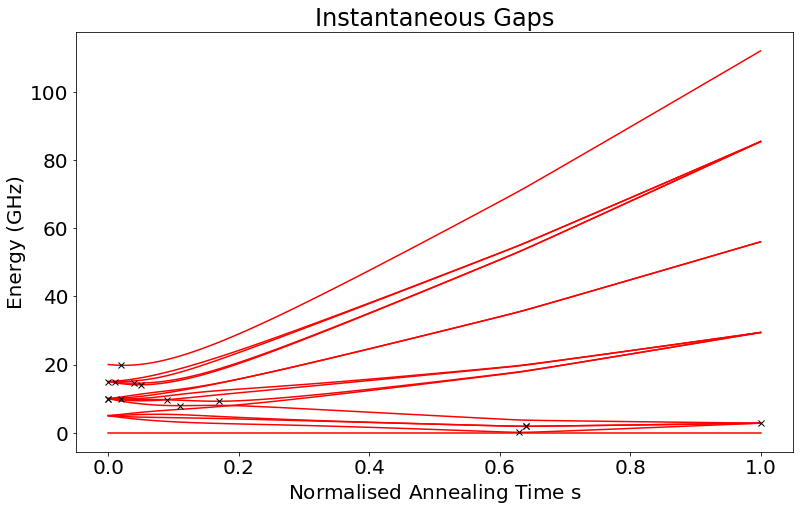

In [13]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(len(Echain)):
    ax.plot(anneal_times/tan, Echain[i]/(2*np.pi), "r-")
for i in range(len(Echain_min)):
    ax.plot(Echain_min[i][0]/tan, Echain_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('Instantaneous Gaps')

In [14]:
print ("First gap:")
print (Echain_min[0][1]/(2*np.pi))

First gap:
0.10310701860665138


Text(0.5, 1.0, 'First Instantaneous Gap')

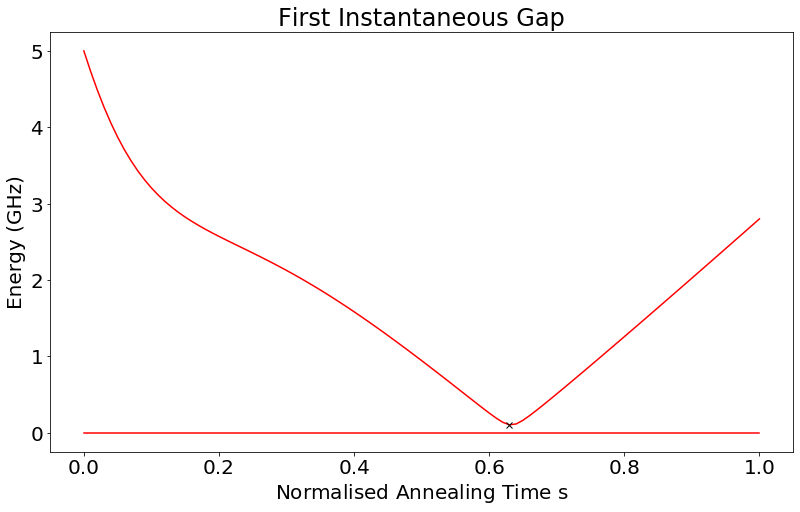

In [15]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(2):
    ax.plot(anneal_times/tan, Echain[i]/(2*np.pi), "r-")
for i in range(1):
    ax.plot(Echain_min[i][0]/tan, Echain_min[i][1]/(2*np.pi), "kx")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('First Instantaneous Gap')

### Both Instantaneous Gaps Side-by-Side

Text(0.5, 1.0, 'First Instantaneous Gap')

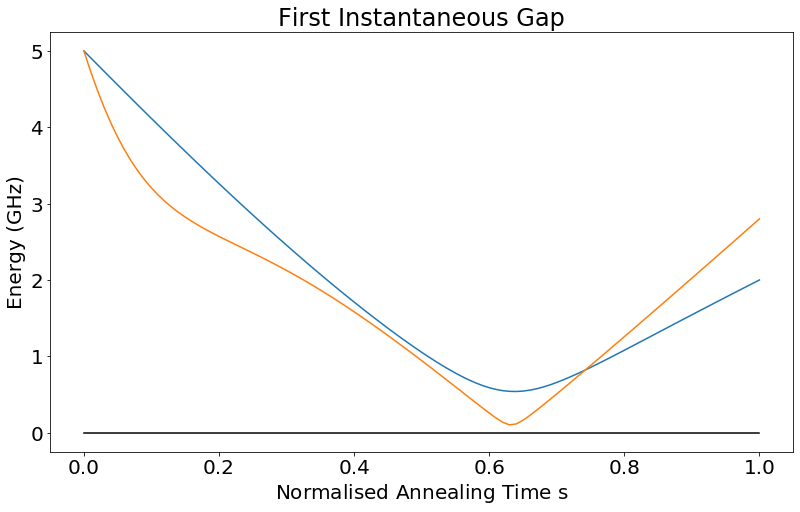

In [16]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
ax.plot(anneal_times/tan, Echain[0]/(2*np.pi), "k-")
ax.plot(anneal_times/tan, Eloop[1]/(2*np.pi), label="Loop Gadget")
ax.plot(anneal_times/tan, Echain[1]/(2*np.pi), label="Chain Gadget")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('First Instantaneous Gap')

In [17]:
# Save this data
filename = "instantaneous_gaps.bin"
cparams = [Nqb,Rc,D,hxc]
lparams = [Nqb,Rl,hxl]
obj = {
    "chain":[
        cparams,
        [schedule_params,anneal_times,Echain,Echain_min]
    ],
    "loop":[
        lparams,
        [schedule_params,anneal_times,Eloop,Eloop_min]
    ]
}
sd.saveBin(obj,filename)

## Using Linear Schedules

Let's compare these two gadgets when annealed with linear schedules:

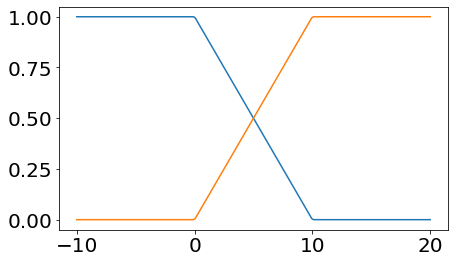

In [18]:
tan = 10
p = {"stype":"linear","tan":tan}
times = np.linspace(-tan,2*tan,201)
As = np.array([ising_schedules.A(t,p) for t in times])
Bs = np.array([ising_schedules.B(t,p) for t in times])
plt.plot(times,As)
plt.plot(times,Bs)

In [19]:
anneal_times = np.linspace(0.1,20.0,301)
p1 = chain1.annealStateProbability(p, anneal_times)
p2 = loop1.annealStateProbability(p, anneal_times)

### Side-by-side GS Probability

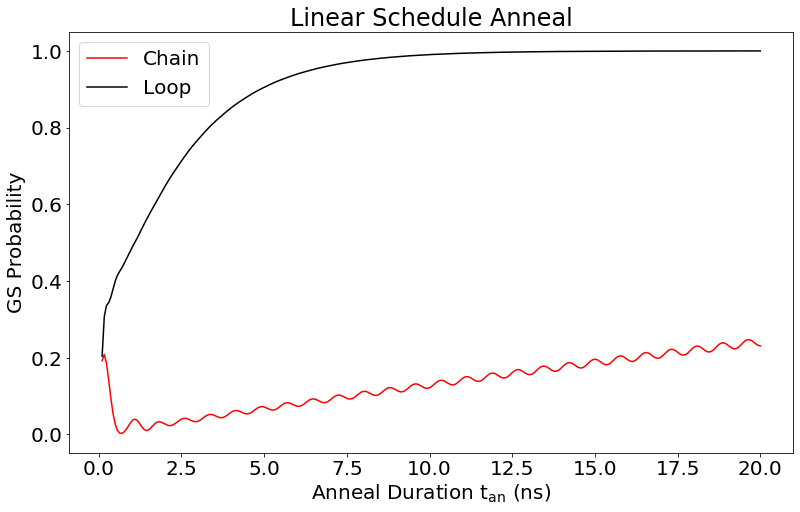

In [20]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
ax.plot(anneal_times, p1[0], "r-", label="Chain")
ax.plot(anneal_times, p2[0], "k-", label="Loop")
ax.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax.set_ylabel('GS Probability')
ax.set_title('Linear Schedule Anneal')
ax.legend()

In [21]:
filename = "linear_anneal_1.bin"
obj = {
    "chain":[
        cparams,
        [anneal_times,p,p1]
    ],
    "loop":[
        lparams,
        [anneal_times,p,p2]
    ]
}
sd.saveBin(obj,filename)

### Higher Excited States

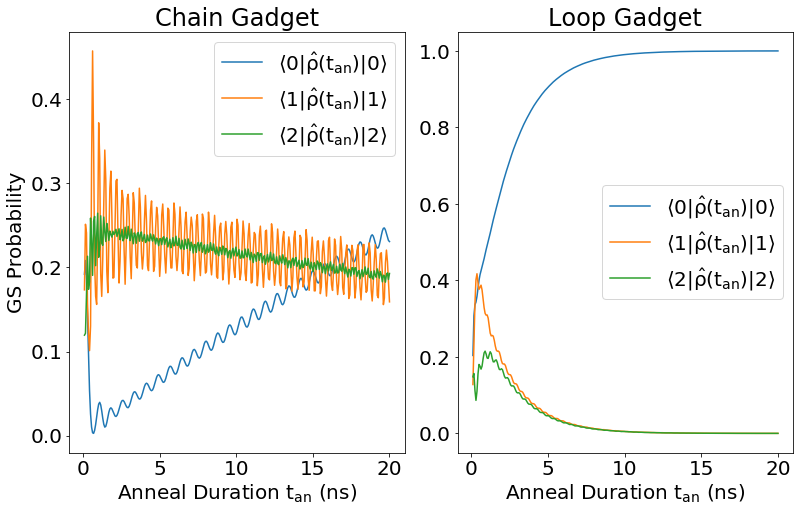

In [22]:
fig, ax = plt.subplots(1,2,constrained_layout=True,figsize=(11,7))
ax1 = ax[0]
ax2 = ax[1]
for i in range(3):
    ax1.plot(anneal_times, p1[i], label="$\\langle %i | \hat{\\rho}(t_{an}) | %i \\rangle$" % (i,i))
#ax1.plot(anneal_times, p1[1], "k-", label="Loop")
ax1.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax1.set_ylabel('GS Probability')
ax1.set_title('Chain Gadget')
ax1.legend()

for i in range(3):
    ax2.plot(anneal_times, p2[i], label="$\\langle %i | \hat{\\rho}(t_{an}) | %i \\rangle$" % (i,i))
#ax1.plot(anneal_times, p1[1], "k-", label="Loop")
ax2.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax2.set_title('Loop Gadget')
ax2.legend()

Clearly the gap is so small in the chain device that a much longer anneal time is needed to get to the adiabatic limit:

In [23]:
anneal_times = np.linspace(1,1000.0,201)
p1_long = chain1.annealStateProbability(p, anneal_times)

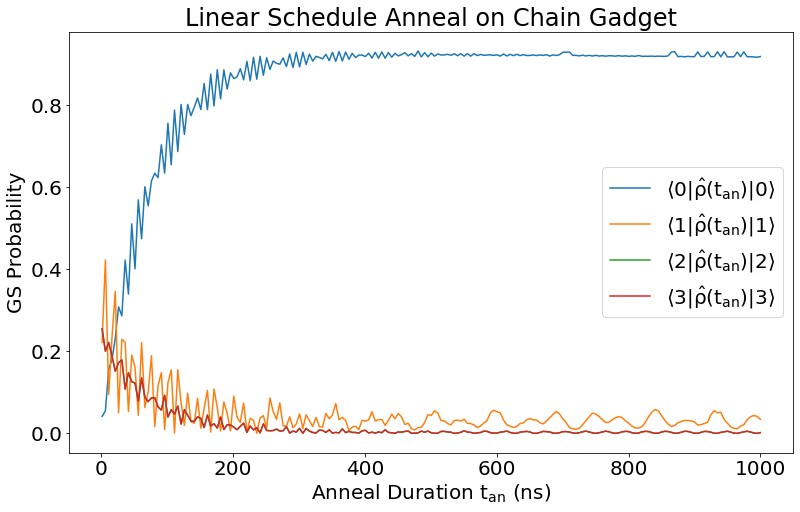

In [24]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range (4):
    ax.plot(anneal_times, p1_long[i], label="$\\langle %i | \hat{\\rho}(t_{an}) | %i \\rangle$" % (i,i))
ax.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax.set_ylabel('GS Probability')
ax.set_title('Linear Schedule Anneal on Chain Gadget')
ax.legend()

In [25]:
filename = "long_chain_anneal.bin"
obj = [
    cparams,
    [anneal_times,p,p1_long]
]
sd.saveBin(obj,filename)

Notice there appear to be small oscillations even when the adiabatic limit is actually reached, why is this?

In [36]:
anneal_times = np.linspace(999.0,1001.0,21)
p1_long_zoom = chain1.annealStateProbability(p, anneal_times)

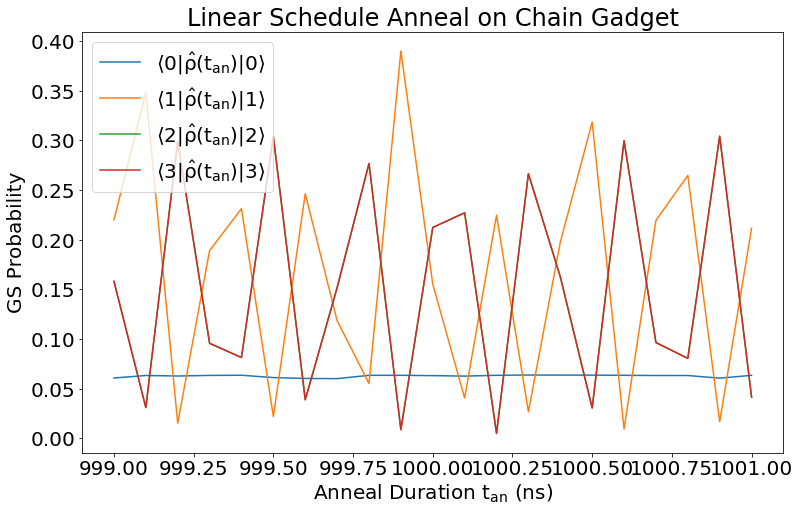

In [37]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range (4):
    ax.plot(anneal_times, p1_long_zoom[i], label="$\\langle %i | \hat{\\rho}(t_{an}) | %i \\rangle$" % (i,i))
ax.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax.set_ylabel('GS Probability')
ax.set_title('Linear Schedule Anneal on Chain Gadget')
ax.legend()

In [27]:
filename = "long_chain_anneal_zoom.bin"
obj = [
    cparams,
    [anneal_times,p,p1_long_zoom]
]
sd.saveBin(obj,filename)

Something is not right if we get a low probability here. Need to debug still.

## Using Half-Wave Schedules

Now let's apply the half-wave schedules for the annealing protocol.

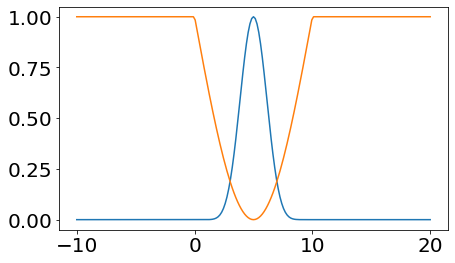

In [38]:
tan = 10
p = {"stype":"hsine","tan":tan,"dist":8.0}
times = np.linspace(-tan,2*tan,201)
As = np.array([ising_schedules.A(t,p) for t in times])
Bs = np.array([ising_schedules.B(t,p) for t in times])
plt.plot(times,As)
plt.plot(times,Bs)

Let's compare the first gap of both gadgets during an anneal of this type. The $h_{x,z}$ terms were adjusted to ensure the minimum gaps occur at roughly the same place during an anneal.

In [39]:
tan = 30.0 # ns
schedule_params = {"tan":tan,"stype":"hsine","dist":8.0}
anneal_times = np.linspace(0,tan,201)
Echain_hsine = chain1.annealInstantaneousGap(schedule_params, anneal_times)
Eloop_hsine = loop1.annealInstantaneousGap(schedule_params, anneal_times)

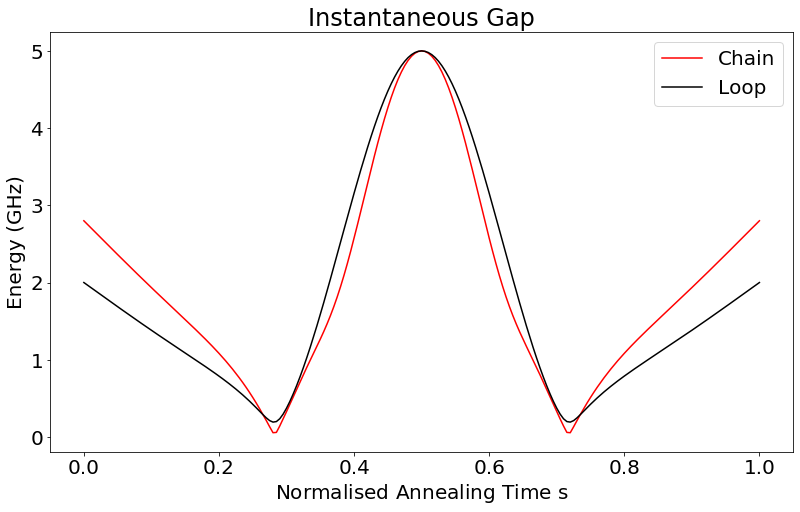

In [40]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
ax.plot(anneal_times/tan, Echain_hsine[1]/(2*np.pi), "r-", label="Chain")
ax.plot(anneal_times/tan, Eloop_hsine[1]/(2*np.pi), "k-", label="Loop")
ax.set_xlabel('Normalised Annealing Time $s$')
ax.set_ylabel('Energy (GHz)')
ax.set_title('Instantaneous Gap')
ax.legend()

In [41]:
# Save this data
filename = "instantaneous_gaps_hsine.bin"
cparams = [Nqb,Rc,D,hxc]
lparams = [Nqb,Rl,hxl]
obj = {
    "chain":[
        cparams,
        [schedule_params,anneal_times,Echain_hsine]
    ],
    "loop":[
        lparams,
        [schedule_params,anneal_times,Eloop_hsine]
    ]
}
sd.saveBin(obj,filename)

Now let's look at the GS probability after an anneal for a range of annealing times:

In [44]:
anneal_times = np.linspace(0.1,20.0,301)
p1 = chain1.annealStateProbability(schedule_params, anneal_times)
p2 = loop1.annealStateProbability(schedule_params, anneal_times)

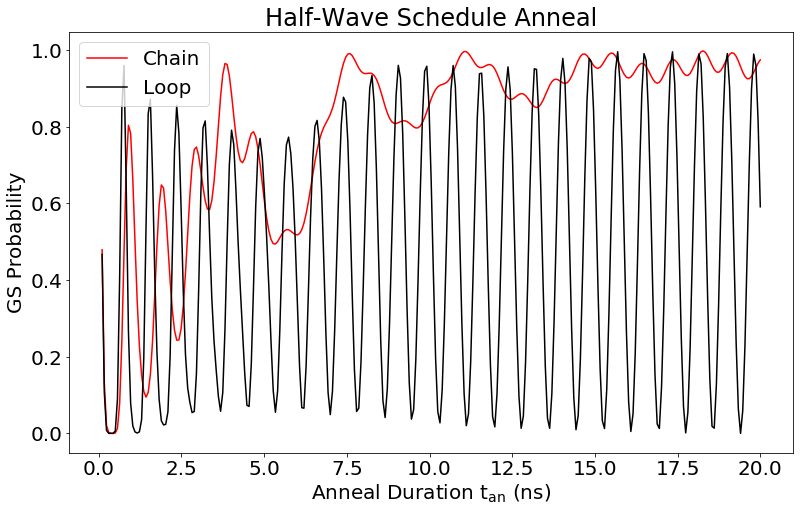

In [46]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
ax.plot(anneal_times, p1[0], "r-", label="Chain")
ax.plot(anneal_times, p2[0], "k-", label="Loop")
ax.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax.set_ylabel('GS Probability')
ax.set_title('Half-Wave Schedule Anneal')
ax.legend()

In [47]:
filename = "hsine_anneal_1.bin"
obj = {
    "chain":[
        cparams,
        [anneal_times,p,p1]
    ],
    "loop":[
        lparams,
        [anneal_times,p,p2]
    ]
}
sd.saveBin(obj,filename)

Let's simulate the chain device for a while longer to see what happens:

In [48]:
anneal_times = np.linspace(0.1,100.0,401)
p1_long = chain1.annealStateProbability(schedule_params, anneal_times)

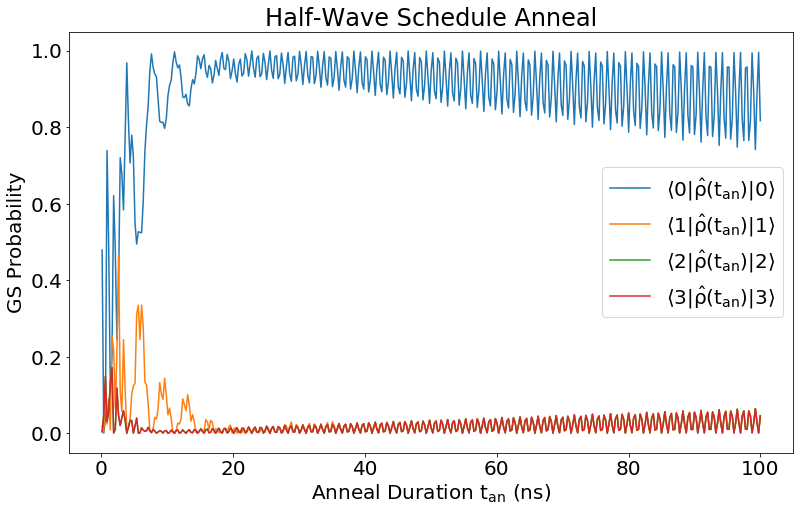

In [50]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(4):
    ax.plot(anneal_times, p1_long[i], label="$\\langle %i | \hat{\\rho}(t_{an}) | %i \\rangle$" % (i,i))
ax.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax.set_ylabel('GS Probability')
ax.set_title('Half-Wave Schedule Anneal')
ax.legend()

In [51]:
anneal_times = np.linspace(100.0,400.0,401)
p1_long2 = chain1.annealStateProbability(schedule_params, anneal_times)

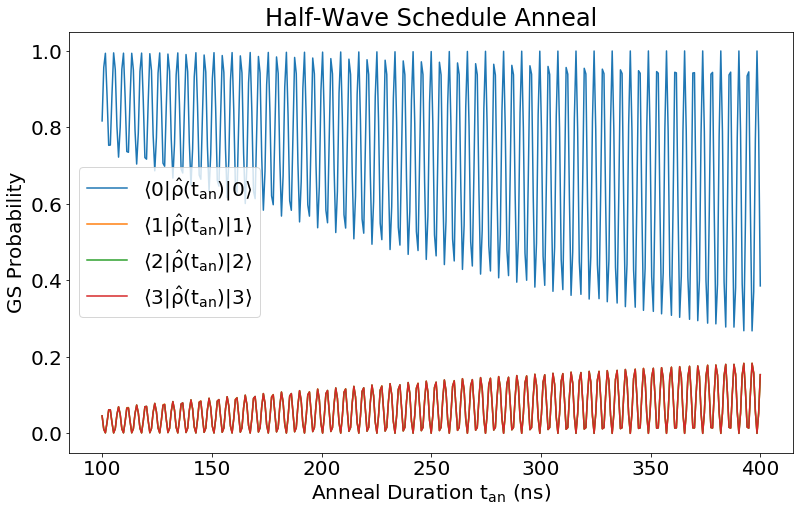

In [52]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(11,7))
for i in range(4):
    ax.plot(anneal_times, p1_long2[i], label="$\\langle %i | \hat{\\rho}(t_{an}) | %i \\rangle$" % (i,i))
ax.set_xlabel('Anneal Duration $t_{an}$ (ns)')
ax.set_ylabel('GS Probability')
ax.set_title('Half-Wave Schedule Anneal')
ax.legend()

In [53]:
filename = "long_chain_anneal1and2.bin"
obj = [
    cparams,
    [anneal_times,schedule_params,p1_long,p1_long2]
]
sd.saveBin(obj,filename)